## Setup

In [1]:
%%time
from functions import *

CPU times: user 7min 52s, sys: 703 ms, total: 7min 53s
Wall time: 7min 53s


In [2]:
%%time
p = 2^521 - 1
# proof.arithmetic(False)
F = GF(p)
A = p-3
B = 1093849038073734274511112390766805569936207598951683748994586394495953116150735016013708737573759623248592132296706313309438452531591012912142327488478985984
E = EllipticCurve([F(A), F(B)])
q = E.cardinality()

CPU times: user 719 ms, sys: 0 ns, total: 719 ms
Wall time: 720 ms


In [3]:
pointString_decode(stringPoint_encode(E, 'criptografia uhul!'))

'criptografia uhul!'

In [4]:
m = 'Oi Bob, tudo bom? Como vai voce? O numero maximo e 64 caracteresa'
pointString_decode(stringPoint_encode(E, m))

'Oi Bob, tudo bom? Como vai voce? O numero maximo e 64 caracteresa'

In [6]:
# %%time
P = base_point(E)
print(u'O ponto base é: ')
print(P)

O ponto base é: 
(700157553609895198606030148698551444209474201775377438532014963008459754514226414236499068665410883101715353089843587497615169203289705224864065360308822736 : 5299208381519658492514757258232770689069885871602771258856842316221615734155595594361644939069920069472490586794583993498777993025144072346808457312341519031 : 1)


In [8]:
# %%time
alice_keys = generate_keys(E, P)

print(u'Chave Privada (Alice): %s \n \n' %(alice_keys[0]))
print(u'Chave Pública (Alice):')
print(alice_keys[1])
print('\n')



Chave Privada (Alice): 4801878051447344798343037224848325735425641698741892418522261831234721619627695590675224505122189316854496869651774980885297499210653208411880409105303202168 
 

Chave Pública (Alice):
(3180674609269496823708708370313229689726007216974230780250622426000353444507543828023408921871736899946585864227435267738662372764751818755211450166826136509 : 1016755019610307359656991504547053093954772807145198881283546702634642094947933622888588928624552008470752781480065378492179556520163767997841353281568879616 : 1)




In [9]:
# %%time
bob_keys = generate_keys(E, P)

print(u'Chave Privada (Bob): %s \n \n' %(bob_keys[0]))
print(u'Chave Pública (Bob):')
print(bob_keys[1])
print('\n')

Chave Privada (Bob): 3015614602849582226110871072149168981289110127459679673748365760405757932290665441372011950748144259750928998546326214801789709897409809232616477700155757194 
 

Chave Pública (Bob):
(5007507640317541839443195071892225582116982989867511616918232592331653950192058769074860411047174650935972843480744480196406878786466677623749230154456765465 : 3463841957239566545544779446738125807360220293905884556289027077649657648039097716932036575253697859480437998789745069994518106402620141681998879403329630196 : 1)




In [11]:
t0 = encode(E, P, 'oi bob tudo bom?', alice_keys[0], alice_keys[1],bob_keys[1])[0][0]
t1 = encode(E, P, 'oi bob tudo bom?', alice_keys[0], alice_keys[1],bob_keys[1])[0][1]

print('Mensagem encriptada, primeira parte: ')
print(t0)
print('\n Mensagem encriptada, segunda parte:')
print(t1)

Mensagem encriptada, primeira parte: 
(2454034941712111951754235948642375821031333777567997284709233758133838301313147939928184419549101144588589467739210928214982311258448248208522305912237937670 : 1598753604053497535262542498718208073474727224737196425938258278632726106351711656510603464143438247243330574225582672981867515222999040338414285978596468665 : 1)

 Mensagem encriptada, segunda parte:
(3575252206520505161290154484338433773811134778529483907690530133150400002471242987218755624590175920654489138774104291740271787180132853320822687005644315632 : 2450016957990978414464542667316549860255598220552525541111469437639512928239676863459244299951149076403238150657841907376220280527743592552195507049558619729 : 1)


In [12]:
decode(E, P, encode(E, P, 'Oi Bob, tudo bom? Como vai voce? O numero maximo e 64 caracteres', alice_keys[0], alice_keys[1], bob_keys[1]), alice_keys[1], bob_keys[0])

'Oi Bob, tudo bom? Como vai voce? O numero maximo e 64 caracteres'

In [13]:
from PIL import Image

In [14]:
coala = Image.open(r'imgs/coala.jpg')

In [15]:
pixels = list(coala.getdata())

In [19]:
%%time
new_pixels = pointImage_decode(imagePoint_encode(E, coala))

encode red
encode green
encode blue
decode red
decode green
decode blue
CPU times: user 38.8 s, sys: 93.8 ms, total: 38.9 s
Wall time: 40.3 s


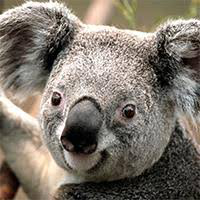

In [20]:
im2 = Image.new(coala.mode, coala.size)
im2.putdata(new_pixels)
im2

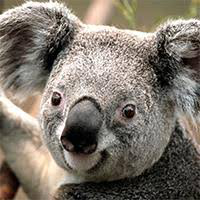

In [21]:
coala

In [22]:
%%time
enc_pixels = encodeImage(E, P, coala, alice_keys[0], alice_keys[1],bob_keys[1])

encode red
encode green
encode blue
CPU times: user 6min, sys: 1.81 s, total: 6min 1s
Wall time: 6min 3s


In [23]:
%%time
dec_pixels = decodeImage(E, P, enc_pixels, alice_keys[1], bob_keys[0])

decode red
decode green
decode blue
CPU times: user 1min 48s, sys: 31.2 ms, total: 1min 48s
Wall time: 1min 48s


In [24]:
len(dec_pixels)

40000

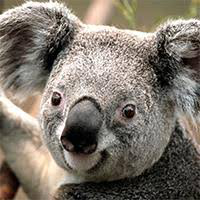

In [25]:
im2 = Image.new(coala.mode, coala.size)
im2.putdata(dec_pixels)
im2

In [26]:
%%time
wrong_key_pixels1 = decodeImage(E, P, enc_pixels, alice_keys[1], bob_keys[0] - 1)

decode red
decode green
decode blue
CPU times: user 1min 48s, sys: 46.9 ms, total: 1min 48s
Wall time: 1min 48s


In [27]:
len(wrong_key_pixels1)

40546

In [29]:
im3 = Image.new(coala.mode, coala.size)
im3.putdata(wrong_key_pixels1[564:])
# im3

In [30]:
%%time
wrong_key_pixels2 = decodeImage(E, P, enc_pixels, alice_keys[1], bob_keys[0] + 1)

decode red
decode green
decode blue
CPU times: user 1min 48s, sys: 1.03 s, total: 1min 49s
Wall time: 1min 50s


In [31]:
len(wrong_key_pixels2)

40554

In [33]:
im4 = Image.new(coala.mode, coala.size)
im4.putdata(wrong_key_pixels2[570:])
# im3

In [34]:
import matplotlib.pyplot as plt

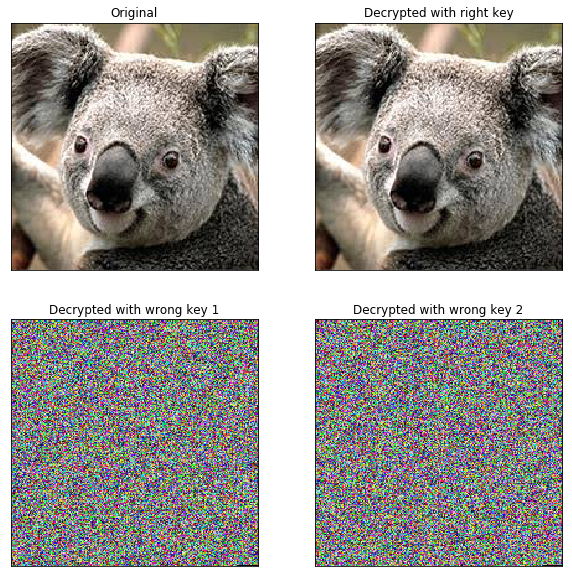

In [35]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols = 2, nrows = 2, figsize=(10, 10))

ax1.imshow(coala)
ax2.imshow(im2)
ax3.imshow(im3)
ax4.imshow(im4)
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticks([]);
    ax.set_yticks([]);

ax1.set_title('Original');
ax2.set_title('Decrypted with right key');
ax3.set_title('Decrypted with wrong key 1');
ax4.set_title('Decrypted with wrong key 2');


In [36]:
diff_wrong_pixels = [(abs(p1[0] - p2[0]), abs(p1[1] - p2[1]), abs(p1[2] - p2[2])) for p1,p2 in zip(wrong_key_pixels1[564:], wrong_key_pixels2[570:])]
diff_right_pixels = [(abs(p1[0] - p2[0]), abs(p1[1] - p2[1]), abs(p1[2] - p2[2])) for p1,p2 in zip(pixels, dec_pixels)]

In [37]:
im5 = Image.new(coala.mode, coala.size)
im5.putdata(diff_wrong_pixels)

im6 = Image.new(coala.mode, coala.size)
im6.putdata(diff_right_pixels)


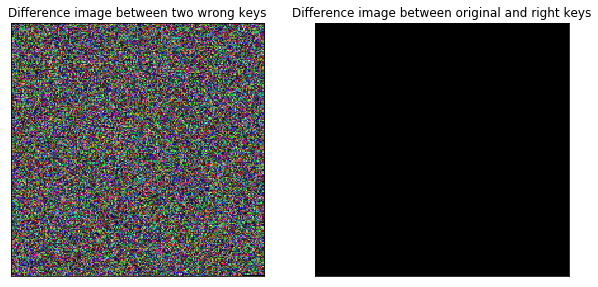

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,10))

ax1.imshow(im5)
ax2.imshow(im6)

ax1.set_title('Difference image between two wrong keys');
ax2.set_title('Difference image between original and right keys');

for ax in [ax1, ax2]:
    ax.set_xticks([])
    ax.set_yticks([])    

In [40]:
baboon = Image.open(r'imgs/baboon.jpg')

In [42]:
pixels_baboon = list(baboon.getdata())

In [43]:
%%time
new_pixels_baboon = pointImage_decode(imagePoint_encode(E, baboon))

encode red
encode green
encode blue
decode red
decode green
decode blue
CPU times: user 37.9 s, sys: 547 ms, total: 38.5 s
Wall time: 38.8 s


In [44]:
im2_baboon = Image.new(baboon.mode, baboon.size)
im2_baboon.putdata(new_pixels_baboon)

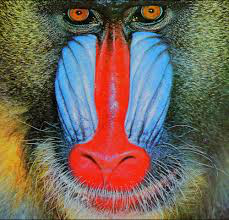

In [45]:
im2_baboon

In [47]:
%%time
enc_pixels_baboon = encodeImage(E, P, baboon, alice_keys[0], alice_keys[1],bob_keys[1])

encode red
encode green
encode blue
CPU times: user 7min 25s, sys: 5.67 s, total: 7min 31s
Wall time: 7min 43s


In [48]:
%%time
wrong_key_pixels_baboon1 = decodeImage(E, P, enc_pixels_baboon, alice_keys[1], bob_keys[0] - 1)

decode red
decode green
decode blue
CPU times: user 2min 13s, sys: 125 ms, total: 2min 13s
Wall time: 2min 17s


In [62]:
%%time
right_pixels_baboon = decodeImage(E, P, enc_pixels_baboon, alice_keys[1], bob_keys[0])

decode red
decode green
decode blue
CPU times: user 2min 7s, sys: 2.11 s, total: 2min 9s
Wall time: 2min 19s


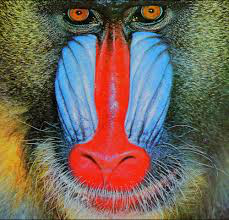

In [65]:
im2_baboon = Image.new(baboon.mode, baboon.size)
im2_baboon.putdata(right_pixels_baboon)
im2_baboon

In [52]:
len(wrong_key_pixels_baboon1) - len(pixels_baboon)

690

In [56]:
im3_baboon = Image.new(baboon.mode, baboon.size)
im3_baboon.putdata(wrong_key_pixels_baboon1[690:])

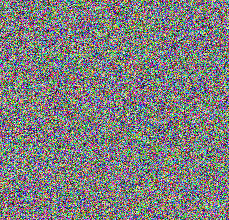

In [57]:
im3_baboon

In [97]:
def compare_image_plots(file):
    image = Image.open(file)
    pixels = list(image.getdata())
    
    print('encrypting')
    %time
    enc_pixels = encodeImage(E, P, image, alice_keys[0], alice_keys[1],bob_keys[1])
    
    print('decrypting with right keys')
    %time
    right_pixels = decodeImage(E, P, enc_pixels, alice_keys[1], bob_keys[0])
    
    print('decrypting with wrong keys 1')
    %time
    wrong_pixels1 = decodeImage(E, P, enc_pixels, alice_keys[1], bob_keys[0] - 1)
    
    print('decrypting with wrong keys 2')
    %time
    wrong_pixels2 = decodeImage(E, P, enc_pixels, alice_keys[1], bob_keys[0] + 1)

    print('plotting')
    ims = [image]
    for pix in [right_pixels, wrong_pixels1, wrong_pixels2]:
        im = Image.new(image.mode, image.size)
        im.putdata(pix[abs(len(pix) - len(pixels)):])
        ims.append(im)
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols = 2, nrows = 2, figsize = (10, 10))
    for ax in [ax1, ax2, ax3, ax4]:
        ax.set_xticks([]);
        ax.set_yticks([]);
    
    titles = ['Original', 
              'Decrypted with right private key', 
              'Decrypted with wrong private key 1', 
              'Decrypted with wrong private key 2']
    
    for ax, t, im in zip([ax1, ax2, ax3, ax4], titles, ims):
        ax.set_title(t);
        ax.imshow(im);
    
    plt.show()
    return fig

encrypting
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.72 µs
encode red
encode green
encode blue
decrypting with right keys
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 13.8 µs
decode red
decode green
decode blue
decrypting with wrong keys 1
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.9 µs
decode red
decode green
decode blue
decrypting with wrong keys 2
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 13.1 µs
decode red
decode green
decode blue
plotting


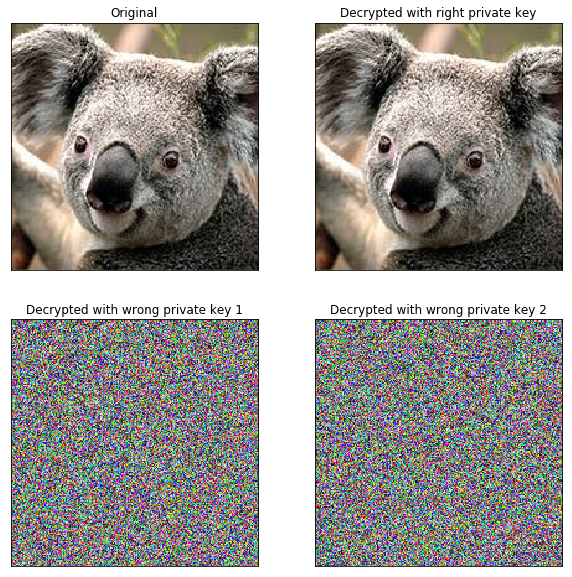

CPU times: user 11min 32s, sys: 7.61 s, total: 11min 39s
Wall time: 11min 55s


In [98]:
%%time
fig = compare_image_plots(r'imgs/coala.jpg')

In [99]:
fig.savefig('coala_graphs.png')

encrypting
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 17.2 µs
encode red
encode green
encode blue
decrypting with right keys
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 14.3 µs
decode red
decode green
decode blue
decrypting with wrong keys 1
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 14.8 µs
decode red
decode green
decode blue
decrypting with wrong keys 2
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 14.1 µs
decode red
decode green
decode blue
plotting


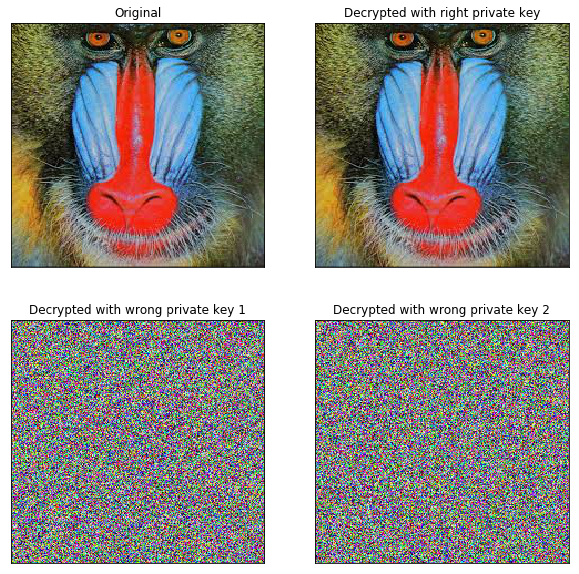

CPU times: user 14min 13s, sys: 6.52 s, total: 14min 20s
Wall time: 14min 24s


In [100]:
%%time
fig_baboon = compare_image_plots(r'imgs/baboon.jpg')

In [101]:
fig_baboon.savefig('baboon_graphs.png')

encrypting
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 18.6 µs
encode red
encode green
encode blue
decrypting with right keys
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.48 µs
decode red
decode green
decode blue
decrypting with wrong keys 1
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.48 µs
decode red
decode green
decode blue
decrypting with wrong keys 2
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.48 µs
decode red
decode green
decode blue
plotting


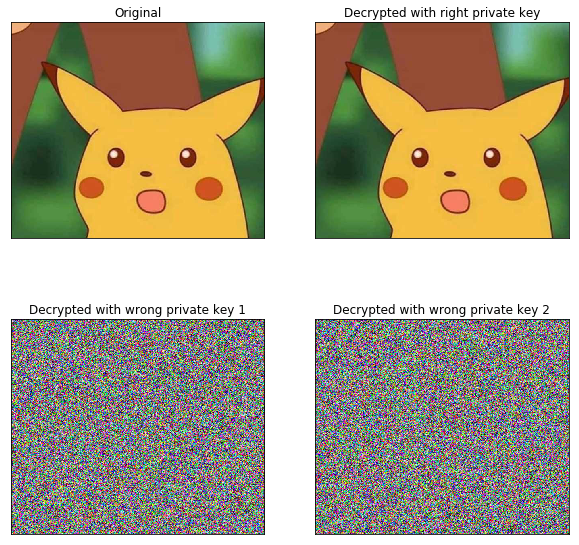

CPU times: user 49min 49s, sys: 50.6 s, total: 50min 40s
Wall time: 50min 47s


In [103]:
%%time
fig_pikachu = compare_image_plots(r'imgs/pikachu.jpg')

In [104]:
fig_pikachu.savefig('pikachu_graphs.png')